# Imports

In [ ]:
from __future__ import absolute_import,division,print_function,unicode_literals

#importing tensorflow,keras,matplotlib and numpy
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
tf.enable_eager_execution()


In [ ]:
    from tensorflow.examples.tutorials.mnist import input_data
    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


**Conversion of The Input Train and Test Data to The requred format which can be omputed By the Model Easily :**

In [ ]:

mnist_train_img=tf.reshape(mnist.train.images,[-1,28,28])
mnist_train_labels=np.zeros((55000,),dtype=int)
for i in range (55000):
  mnist_train_labels[i] = np.argmax(mnist.train.labels)


(55000,)


7


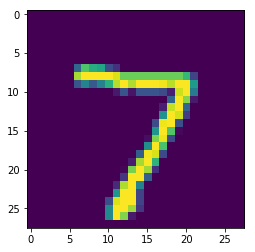

In [ ]:

mnist_test_img=tf.reshape(mnist.test.images,[-1,28,28])
mnist_test_labels = np.zeros((10000,),dtype=int)
for i in range(10000):
  mnist_test_labels[i] = np.argmax(mnist.test.labels)
plt.imshow(mnist_test_img[0])
print(mnist_test_labels[0])

# Preprocessing The Data

In [ ]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [ ]:
mnist_train_img = mnist_train_img/255.0;
mnist_test_img = mnist_test_img/255.0;

# Building The Model

In [ ]:
model = keras.Sequential([
         keras.layers.Flatten(input_shape=(28,28)),
         keras.layers.Dense(128,activation=tf.nn.relu),
         keras.layers.Dense(10,activation=tf.nn.softmax)])


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Training The Model

In [ ]:
model.fit(mnist_train_img,mnist_train_labels,epochs=5)

W0719 07:00:03.697697 139918483494784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
55000/55000 [==============================] - 4s 74us/sample - loss: 0.0779 - acc: 0.9995
Epoch 2/5
55000/55000 [==============================] - 3s 62us/sample - loss: 1.9777e-04 - acc: 1.0000
Epoch 3/5
55000/55000 [==============================] - 3s 62us/sample - loss: 5.1127e-05 - acc: 1.0000
Epoch 4/5
55000/55000 [==============================] - 3s 61us/sample - loss: 1.7402e-05 - acc: 1.0000
Epoch 5/5
55000/55000 [==============================] - 3s 62us/sample - loss: 6.5792e-06 - acc: 1.0000


In [ ]:
test_loss,test_acc=model.evaluate(mnist_test_img,mnist_test_labels)
print("Test Accuracy : ",test_acc)

10000/10000 [==============================] - 0s 28us/sample - loss: 3.8688e-06 - acc: 1.0000
Test Accuracy :  1.0


# Predictions

In [ ]:
predictions = model.predict(mnist_test_img)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

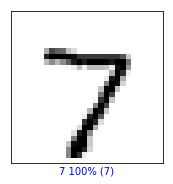

In [ ]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(0,predictions,mnist_test_labels,mnist_test_img)

# Generating Adversarial Images  Using FGSM

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def generate_adversary(input_image,input_label):
  input_image = tf.cast(input_image,tf.float32)
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label,prediction)
    
  gradient = tape.gradient(loss, input_image)
  signed_grad = tf.sign(gradient)
  return signed_grad

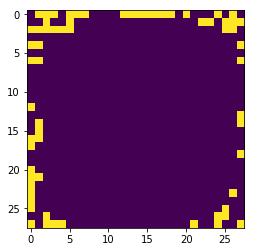

In [ ]:

img = mnist_test_img[0]
img = (np.expand_dims(img,0))
image = img
#print(img.shape)
#plt.imshow(img[0])
perturbations = generate_adversary(img,model.predict(img))
plt.imshow(perturbations[0])

In [ ]:
def display_images(img,image,description):
  predictions_array = model.predict(img)
  actual_array = model.predict(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[0])
  actual_label = np.argmax(actual_array)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == actual_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} \n {} {:2.0f}% ({})".format(description,class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[actual_label]),
                                color=color)
  plt.show()

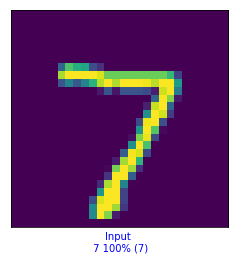

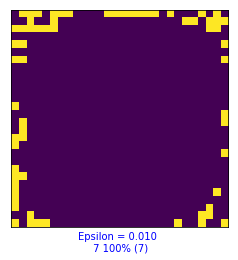

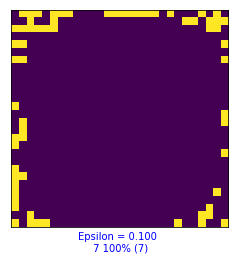

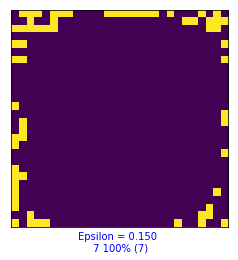

In [ ]:

epsilons = [0, 0.01,0.1,0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = img + eps*perturbations 
  adv_x = np.clip(adv_x, 0, 1)
  display_images(adv_x,image, descriptions[i])
